In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#3.1
gold = pd.read_csv('D:\intern\module 1\GOLD.csv')

In [3]:
gold.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [4]:
gold.tail()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693
511,"May 03, 2019",31341,31250,31500,31163,0.08K,0.44%,NaN,429.924911


In [5]:
gold['Pred'].isnull().any() #contains null values

True

In [6]:
gold['new'].isnull().any() #no null values

False

In [7]:
pd.isnull(gold).any(1).to_numpy().nonzero()[0]

array([411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423,
       424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436,
       437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449,
       450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462,
       463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475,
       476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488,
       489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501,
       502, 503, 504, 505, 506, 507, 508, 509, 510, 511], dtype=int64)

All values starting from 411 are nulls

In [8]:
X = gold.iloc[:411,1:5].values
y = gold.iloc[:411,7].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_predictions = regressor.predict(X_test)

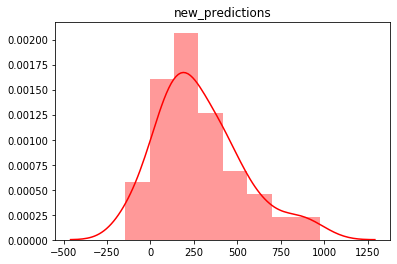

In [12]:
plt.title('new_predictions')
sns.distplot(y_predictions,color='red')

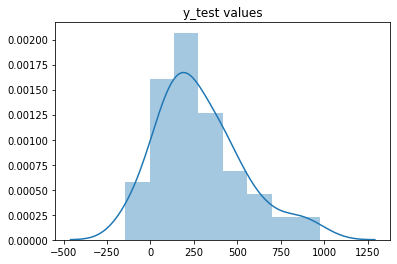

In [13]:
plt.title('y_test values')
sns.distplot(y_test)

(array([ 3.,  8., 13., 13., 11.,  6.,  2.,  2.,  2.,  2.]),
 array([-146. ,  -33.7,   78.6,  190.9,  303.2,  415.5,  527.8,  640.1,
         752.4,  864.7,  977. ]),
 <a list of 10 Patch objects>)

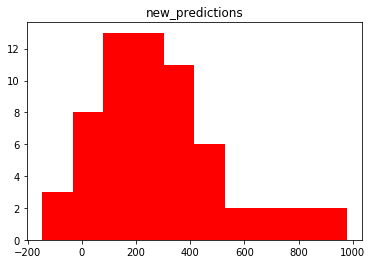

In [14]:
plt.title('new_predictions')
plt.hist(y_predictions,color='red')

(array([ 3.,  8., 13., 13., 11.,  6.,  2.,  2.,  2.,  2.]),
 array([-146. ,  -33.7,   78.6,  190.9,  303.2,  415.5,  527.8,  640.1,
         752.4,  864.7,  977. ]),
 <a list of 10 Patch objects>)

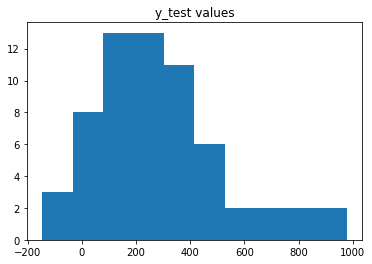

In [15]:
plt.title('y_test values')
plt.hist(y_test)

In [16]:
print(y_test[:5],y_predictions[:5])
print(y_test[-5:],y_predictions[-5:])

[337. 230. 524. 306. 262.] [337. 230. 524. 306. 262.]
[125. 517. 189. 101. -32.] [125. 517. 189. 101. -32.]


We can observe that all the plots are similar and y_test and y_prdictions values are same, hence our model fitted data perfectly.
So, now we can use our model to fill null values as our model is accurate.

In [17]:
print(f'Regression Model optimal Co-efficients of OHLC prices: {regressor.coef_}')

Regression Model optimal Co-efficients of OHLC prices: [ 2.  3. -1. -4.]


In [18]:
print(f'Intercept of model: {regressor.intercept_}')

Intercept of model: 2.461320036672987e-11


## Filling Null Values

In [19]:
X_null = gold.iloc[411:,1:5].values

In [20]:
X_null[:5,:5]

array([[31812, 31850, 31850, 31618],
       [31626, 31749, 31749, 31582],
       [31414, 31550, 31600, 31337],
       [31437, 31440, 31514, 31384],
       [31501, 31369, 31530, 31291]], dtype=int64)

In [21]:
y_null = regressor.predict(X_null)

In [22]:
y_null.shape

(101,)

In [23]:
y_pred_new = np.concatenate((y,y_null))

In [24]:
y_pred_new.shape

(512,)

In [25]:
y_pred_new[:5]

array([ 738., -146.,   30.,  357.,  124.])

In [26]:
gold['Pred'] = y_pred_new

In [27]:
gold.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [28]:
gold.tail()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,535.0,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,438.0,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,269.0,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,601.0,48.365693
511,"May 03, 2019",31341,31250,31500,31163,0.08K,0.44%,280.0,429.924911


In [29]:
regressor2 = LinearRegression()

In [30]:
X_new = gold.iloc[:,1:5].values
y_new = gold.iloc[:,8].values
y_new[:5]

array([117.57074041, 295.43017594, 132.12371428, 101.29806419,
       112.15331832])

In [31]:
X_new.shape,y_new.shape

((512, 4), (512,))

In [32]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size = 0.15, random_state = 0)

In [33]:
X_new_train.shape, X_new_test.shape, y_new_train.shape, y_new_test.shape

((435, 4), (77, 4), (435,), (77,))

In [34]:
regressor2.fit(X_new_train,y_new_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
y_new_predictions = regressor2.predict(X_new_test)

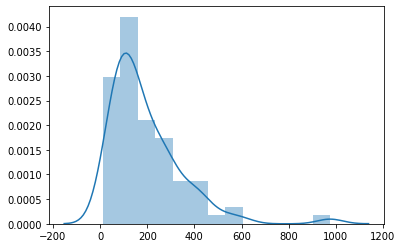

In [36]:
sns.distplot(y_new_predictions)

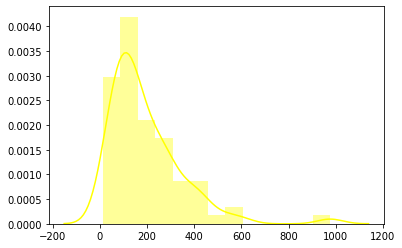

In [37]:
sns.distplot(y_new_test, color = 'yellow')

(array([27., 23., 12.,  7.,  5.,  1.,  1.,  0.,  0.,  1.]),
 array([ 10.99251095, 107.45575575, 203.91900055, 300.38224534,
        396.84549014, 493.30873494, 589.77197974, 686.23522454,
        782.69846934, 879.16171413, 975.62495893]),
 <a list of 10 Patch objects>)

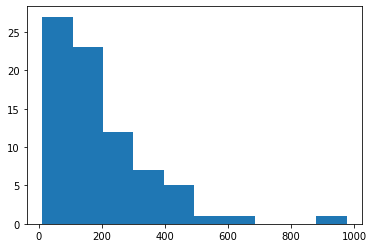

In [38]:
plt.hist(y_new_predictions)

(array([28., 22., 12.,  7.,  5.,  1.,  1.,  0.,  0.,  1.]),
 array([ 11.10981387, 107.66810303, 204.22639219, 300.78468135,
        397.34297051, 493.90125967, 590.45954883, 687.01783799,
        783.57612715, 880.13441631, 976.69270547]),
 <a list of 10 Patch objects>)

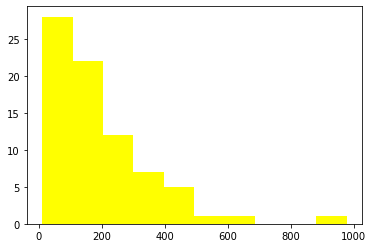

In [39]:
plt.hist(y_new_test,color = 'yellow')

In [40]:
print(y_new_predictions[:5],y_new_predictions[-5:])
print(y_new_test[:5],y_new_test[-5:])

[ 78.99006832 128.63510914 301.54705706  98.18470938  95.54057364] [ 59.10072345  89.11079201 151.98694509 249.46495825  89.95451826]
[ 79.32753539 129.13459068 301.00877441  97.8066585   96.17588241] [ 56.89655172  89.2103138  152.28856424 249.05120322  90.33796384]


Here we can observe some differences in predicted values and test values, i.e model is didn't fit exactly.

Therefore, we can say that 'Pred' Column is linear function and 'new' column is Polynomial function.
Because pred column fitted linear model perfectly, where as 'new' column didn't fit the model accurately.

So, we can conclude that 'Pred' column is linear function & 'new' column is polynomial function.

In [41]:
#3.2
nifty = pd.read_csv('D:\intern\module 1\\Nifty50\\Nifty50.csv')
reddy = pd.read_csv('D:\intern\module 1\Large_Cap\DRREDDY.csv')

In [42]:
nifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [43]:
reddy.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,DRREDDY,EQ,15-May-2017,2580.80,2600.00,2699.00,2592.00,2667.5,2675.80,2655.42,946756,2.514038e+09,60746,392469,41.45
1,DRREDDY,EQ,16-May-2017,2675.80,2690.80,2734.00,2690.80,2717.5,2724.10,2721.18,440462,1.198577e+09,27798,144587,32.83
2,DRREDDY,EQ,17-May-2017,2724.10,2720.00,2760.00,2686.55,2738.0,2736.90,2731.48,409818,1.119408e+09,25364,133595,32.60
3,DRREDDY,EQ,18-May-2017,2736.90,2695.00,2719.85,2672.20,2681.1,2678.95,2693.81,282411,7.607614e+08,22125,177774,62.95
4,DRREDDY,EQ,19-May-2017,2678.95,2694.95,2694.95,2637.00,2654.8,2656.45,2659.44,260677,6.932555e+08,35605,152233,58.40


In [44]:
nifty['Date'] = pd.to_datetime(nifty['Date'])
reddy['Date'] = pd.to_datetime(reddy['Date'])

In [45]:
nifty = nifty.set_index('Date')
reddy = reddy.set_index('Date')

In [46]:
nifty.shape

(494, 6)

In [47]:
reddy.shape

(496, 14)

In [48]:
reddy = reddy[reddy['Series']=='EQ']

In [49]:
reddy.shape

(494, 14)

In [50]:
nifty.isnull().any()

Open                 False
High                 False
Low                  False
Close                False
Shares Traded        False
Turnover (Rs. Cr)    False
dtype: bool

In [51]:
reddy.isnull().any()

Symbol                    False
Series                    False
Prev Close                False
Open Price                False
High Price                False
Low Price                 False
Last Price                False
Close Price               False
Average Price             False
Total Traded Quantity     False
Turnover                  False
No. of Trades             False
Deliverable Qty           False
% Dly Qt to Traded Qty    False
dtype: bool

In [52]:
# therefore no null values

In [53]:
nifty_daily_returns = nifty['Close'][:91].pct_change().dropna()
nifty_monthly_returns = nifty['Close'].resample('M').ffill().pct_change().dropna()

In [54]:
reddy_daily_returns = reddy['Close Price'][:91].pct_change().dropna()
reddy_monthly_returns = reddy['Close Price'].resample('M').ffill().pct_change().dropna()

In [55]:
import statsmodels.api as sm

In [56]:
X_daily = sm.add_constant(nifty_daily_returns.values)
X_monthly = sm.add_constant(nifty_monthly_returns.values)

In [57]:
y_daily = reddy_daily_returns.values
y_monthly = reddy_monthly_returns.values

In [58]:
X_daily.shape, X_monthly.shape

((90, 2), (24, 2))

In [59]:
print(X_daily[:2,:])
print()
print(X_monthly[:2,:])

[[1.         0.00707752]
 [1.         0.00141922]]

[[ 1.         -0.01043004]
 [ 1.          0.05841885]]


In [60]:
regressor_daily = sm.OLS(endog=y_daily,exog=X_daily).fit()

In [61]:
regressor_daily.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.530
Date:                Tue, 05 May 2020   Prob (F-statistic):              0.219
Time:                        13:22:22   Log-Likelihood:                 213.51
No. Observations:                  90   AIC:                            -423.0
Df Residuals:                      88   BIC:                            -418.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.002     -0.407      0.685      -0.006       0.004
x1             0.5497      0.444      1.237      0.219      -0.333       1.433
==============================================================================
Omnibus:                       24.070   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.140
Skew:                           0.872   Prob(JB):                     3.21e-14
Kurtosis:                       6.678   Cond. No.                         185.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The co-efficient of x1 is beta daily.

Therefore, beta_daily = 0.5497.

beta_daily < 1.

In [62]:
regressor_monthly = sm.OLS(endog=y_monthly,exog = X_monthly).fit()

In [63]:
regressor_monthly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                    0.1758
Date:                Tue, 05 May 2020   Prob (F-statistic):              0.679
Time:                        13:22:25   Log-Likelihood:                 26.031
No. Observations:                  24   AIC:                            -48.06
Df Residuals:                      22   BIC:                            -45.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0064      0.018      0.364      0.720      -0.030       0.043
x1             0.1825      0.435      0.419      0.679      -0.720       1.085
==============================================================================
Omnibus:                        0.244   Durbin-Watson:                   2.621
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.368
Skew:                           0.201   Prob(JB):                        0.832
Kurtosis:                       2.546   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The co-efficient of x1 is beta monthly.

Therefore, beta_monthly = 0.1825.

beta_monthly < 1.

# Discussion

Both the daily returns and monthly returns beta values are lessthan 1.

We got, beta_daily = 0.5497 which is lessthan 1 and beta_daily = 0.1825 which is also lessthan 1.

If beta value is -ve i.e beta < 0, if that is the case then if market return decreases then stock returns increases, if market return increases then stock returns decreses. Increase or decrease amount depends upon the magnitude of beta value, relation between the market returns and stock returns depends upon sign of beta.

In our case both the beta values are postive therefore, if market returns increses both monthly and daily returns increases because both betas are positives.

Considering beta_daily, beta_daily = 0.5497. So, if market returns increases by x then daily returns increases by 0.5497 * x and vice versa, simillarly beta_monthly = 0.1825. So, if market returns increases by x then monthly returns increases by 0.1825 * x and versa.

If beta is negative, then if market returns increases by x then daily returns decreases by abs(beta) * x and vice versa.